# Concevez une application au service de la santé publique

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration-du-Notebook-d'Exploration" data-toc-modified-id="Configuration-du-Notebook-d'Exploration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration du Notebook d'Exploration</a></span><ul class="toc-item"><li><span><a href="#Importation-des-librairies-utilisées" data-toc-modified-id="Importation-des-librairies-utilisées-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importation des librairies utilisées</a></span></li><li><span><a href="#Importation-de-notre-jeu-de-données-après-nettoyage" data-toc-modified-id="Importation-de-notre-jeu-de-données-après-nettoyage-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importation de notre jeu de données après nettoyage</a></span></li></ul></li><li><span><a href="#Exploration-du-dataset,-analyses-des-variables-et-relations-intervariables" data-toc-modified-id="Exploration-du-dataset,-analyses-des-variables-et-relations-intervariables-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploration du dataset, analyses des variables et relations intervariables</a></span><ul class="toc-item"><li><span><a href="#Corrélation-de-variables" data-toc-modified-id="Corrélation-de-variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Corrélation de variables</a></span></li><li><span><a href="#Analyse-des-variables-nutrition-score-fr_100g,-pnns_groups_1-et-nova_group" data-toc-modified-id="Analyse-des-variables-nutrition-score-fr_100g,-pnns_groups_1-et-nova_group-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Analyse des variables nutrition-score-fr_100g, pnns_groups_1 et nova_group</a></span></li><li><span><a href="#Etude-de-la-corrélation-entre-le-Nutriscore-et-:-'fat_100g',-'carbohydrates_100g'-&amp;-'sugars_100g'" data-toc-modified-id="Etude-de-la-corrélation-entre-le-Nutriscore-et-:-'fat_100g',-'carbohydrates_100g'-&amp;-'sugars_100g'-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Etude de la corrélation entre le Nutriscore et : 'fat_100g', 'carbohydrates_100g' &amp; 'sugars_100g'</a></span></li></ul></li><li><span><a href="#Prédiction-du-nutrition-score" data-toc-modified-id="Prédiction-du-nutrition-score-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prédiction du nutrition score</a></span><ul class="toc-item"><li><span><a href="#Initialisation-des-paramètres" data-toc-modified-id="Initialisation-des-paramètres-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initialisation des paramètres</a></span></li><li><span><a href="#ACP" data-toc-modified-id="ACP-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ACP</a></span></li><li><span><a href="#Modèle-1-:-KNN-Regressor" data-toc-modified-id="Modèle-1-:-KNN-Regressor-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Modèle 1 : KNN Regressor</a></span></li><li><span><a href="#Modèle-2-:-Regression-linéaire" data-toc-modified-id="Modèle-2-:-Regression-linéaire-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Modèle 2 : Regression linéaire</a></span></li><li><span><a href="#Modèle-3-:-Regression-Logistique" data-toc-modified-id="Modèle-3-:-Regression-Logistique-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Modèle 3 : Regression Logistique</a></span></li></ul></li><li><span><a href="#Synthèse-sur-la-faisabilité-de-l'Application" data-toc-modified-id="Synthèse-sur-la-faisabilité-de-l'Application-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Synthèse sur la faisabilité de l'Application</a></span></li></ul></div>

## Configuration du Notebook d'Exploration
### Importation des librairies utilisées

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn import linear_model
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

### Importation de notre jeu de données après nettoyage

In [2]:
dataOpenFoodFacts = pd.read_csv('./openfoodfacts_clean.csv')

C:\Users\maxim\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_final = dataOpenFoodFacts.drop(dataOpenFoodFacts.columns[0], axis = 1)

## Exploration du dataset, analyses des variables et relations intervariables
### Corrélation de variables 
Nous sommes désormais à l'étape d'analyse de nos différentes variables. Nous allons utiliser une matrice de corrélation pour observer des potentiels liens entre variables. Pour cela nous retirons le Nova Group qui est une variable catégorielle bien qu'il ait des valeurs numériques.

In [4]:
data_final['pnns_groups_1'] = data_final['pnns_groups_1'].replace(['fruits-and-vegetables','sugary-snacks','cereals-and-potatoes', 'salty-snacks'],
                                                                ['Fruits and vegetables','Sugary snacks','Cereals and potatoes', 'Salty snacks'])



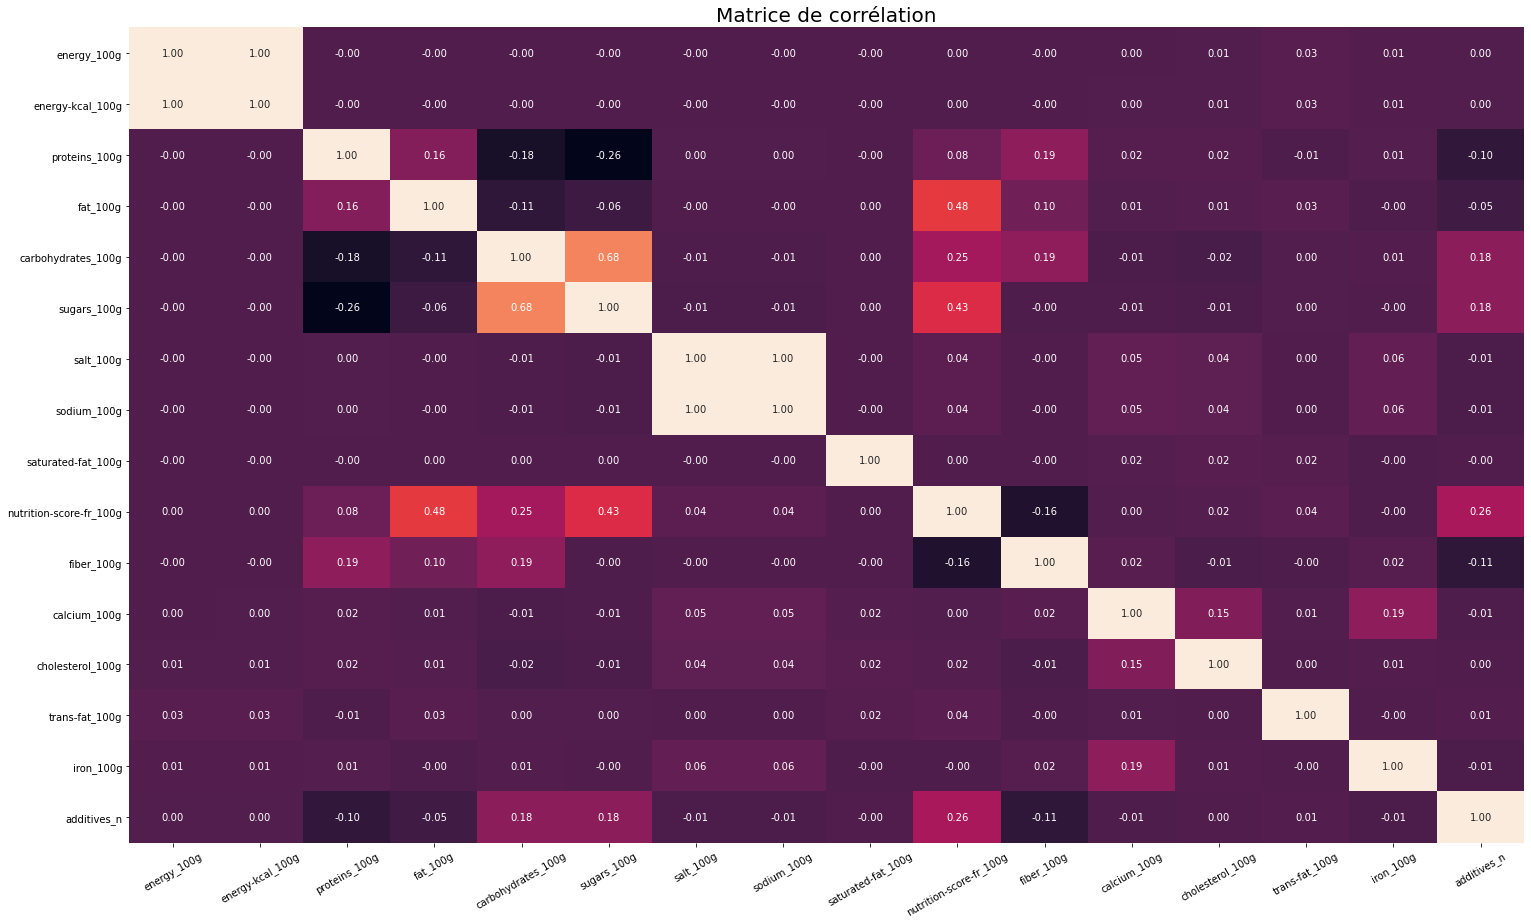

In [5]:
data_corr = data_final.copy()
data_corr.drop('nova_group', axis=1, inplace=True)

corrMatrix = data_corr.corr()

plt.figure(figsize=(25,15))
plt.title("Matrice de corrélation", fontsize=20)
sns.heatmap(corrMatrix,fmt= '.2f', annot=True, cbar=False)
plt.xticks(rotation=30)
plt.show()

Nous remarquons plusieurs choses grâce à cette matrice de corrélation :
- Le **nutrition-score-fr_100g** est corrélé aux variables **fat_100g, carbohydrates_100g, sugars_100g & additives_n**.
- Les paires de variables **energy_100g et energy-kcal_100g** ainsi que **salt_100g et sodium_100g** sont corrélées à 100%. 

Pour une question de redondance, nous allons supprimer **energy-kcal_100g et sodium_100g** qui n'apportent pas d'informations supplémentaires à notre étude.

In [6]:
data_final.drop('energy-kcal_100g', axis=1, inplace=True)
data_final.drop('sodium_100g', axis=1, inplace=True)

### Analyse des variables nutrition-score-fr_100g, pnns_groups_1 et nova_group

Afin d'afiner nos critères quand à la réalisation d'un modèle permettant de définir le nutriscore lorsque celui-ci n'est pas renseigné, il est important de comprendre la part que prend chaque variable lors de la définition de ce dernier. Pour cela nous allons étudier de possibles relations entre ces variables. 


Regardons en premier lieu sur les catégories PNNS 1 comment est réparti le Nutriscore.

[Text(0.5, 0, 'PNNS Group')]

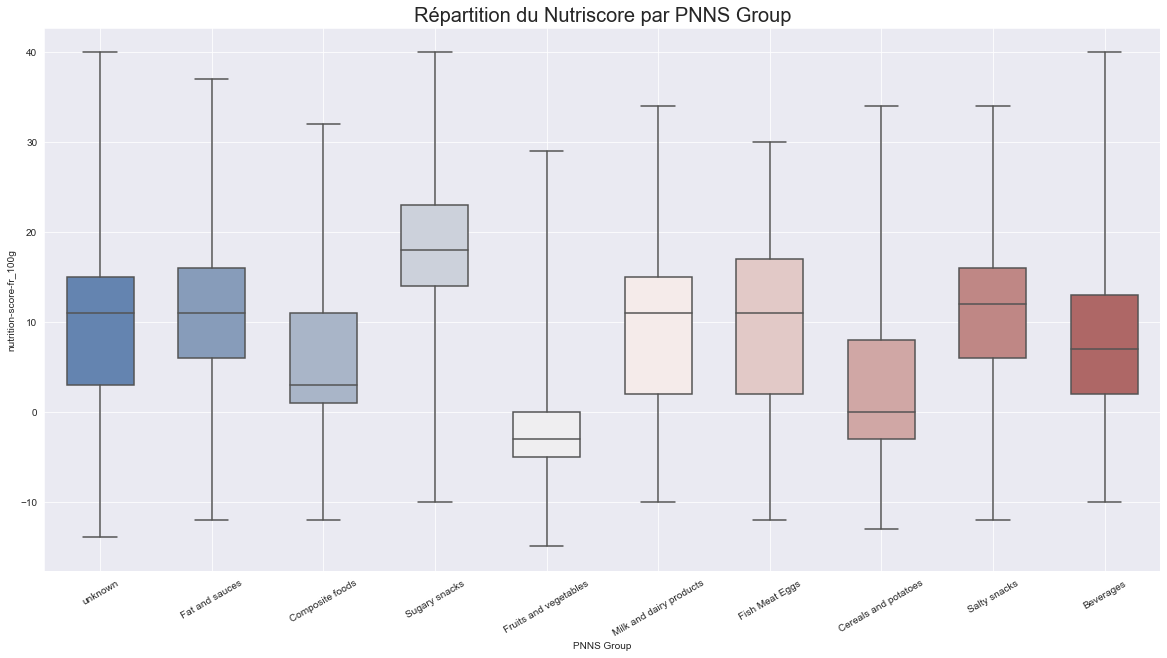

In [7]:
sns.set_style("darkgrid")

f, ax = plt.subplots(figsize=(20, 10))
matplotlib.rc('font', size='15')
plt.title('Répartition du Nutriscore par PNNS Group', fontsize=20)

sns.boxplot(y="nutrition-score-fr_100g", x="pnns_groups_1", data=data_final,
            whis=[0, 100], width=.6, palette="vlag")

ax.xaxis.grid(True)
plt.xticks(rotation=30)
ax.set(xlabel="PNNS Group")

Nous constatons que la catégorie PNNS, lorsque celle-ci est renseignée, apporte un plus à la définition de notre Nutriscore car celui-ci varie considérablement selon la catégorie.

Observons maintenant la répartition du Nutriscore par Nova Group. 

[Text(0.5, 0, 'Nova Group')]

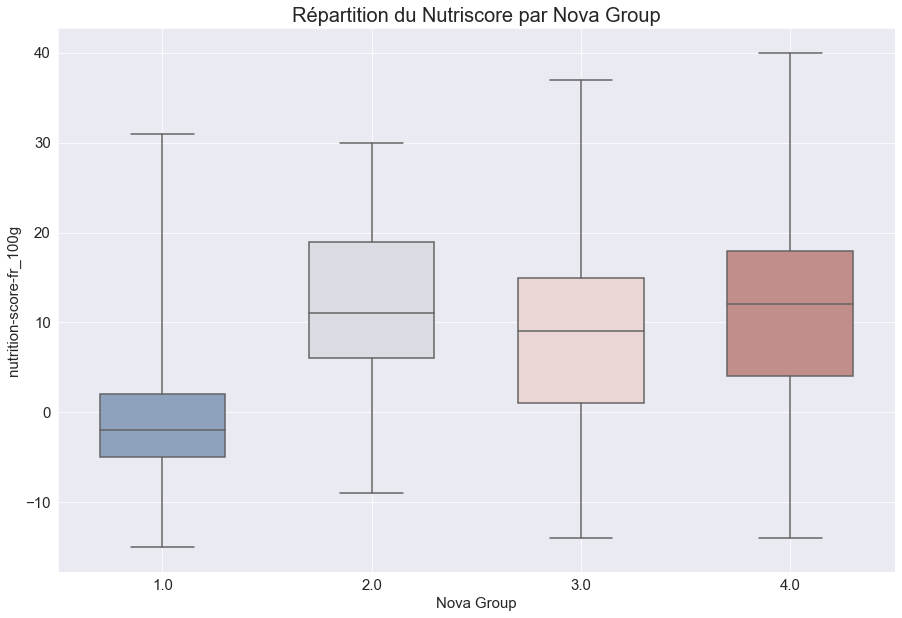

In [8]:
f, ax = plt.subplots(figsize=(15, 10))

plt.title('Répartition du Nutriscore par Nova Group', fontsize=20)

sns.boxplot(y="nutrition-score-fr_100g", x="nova_group", data=data_final,
            whis=[0, 100], width=.6, palette="vlag")

ax.xaxis.grid(True)
ax.set(xlabel="Nova Group")

Pour les produits ayant une valeur de Nova Group égale à 1, nous voyons que le Nutriscore est généralement plus faible (soit meilleur). Ce qui est moins évident à discerner pour les autres valeurs de Nova Group.

Regardons par catégories PNNS 1 comment est réparti le Nova group.

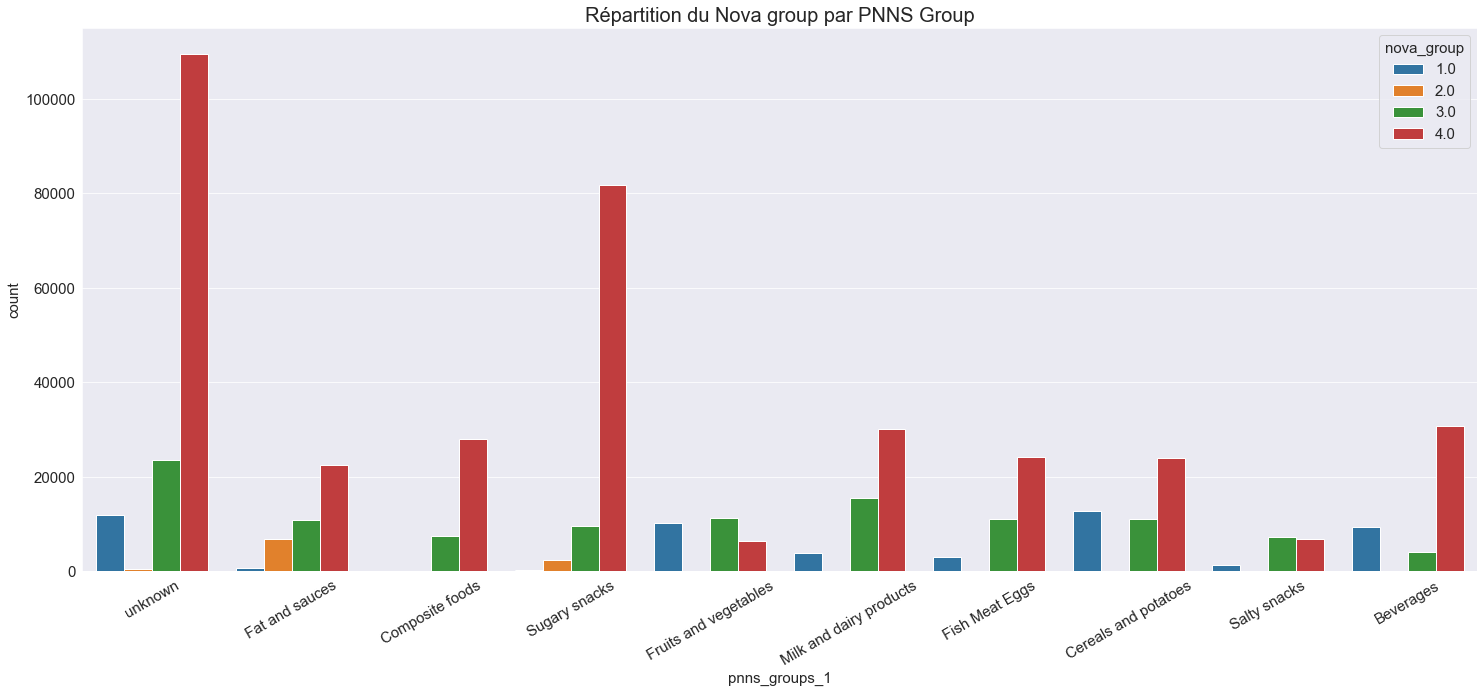

In [9]:
sns.set_style("darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
plt.title('Répartition du Nova group par PNNS Group', fontsize=20)
matplotlib.rc('font', size='15')
plt.xticks(rotation=30)
ax = sns.countplot(x="pnns_groups_1", hue="nova_group", data=data_final)

La catégorie des "Sugary Snacks" se démarque particulièrement avec de nombreux produits de Nova Group égal à 4. Cette catégorie est également celle qui comporte la moyenne nutriscore la plus haute, et donc la moins bonne (vu sur le boxplot "Répartition du Nutriscore par PNNS Group" effectué précédemment).
### Etude de la corrélation entre le Nutriscore et : 'fat_100g', 'carbohydrates_100g' & 'sugars_100g'
Afin d'observer comment est construit notre nutriscore et pour pouvoir choisir de bons models de prédiction, regardons les relations des variables suivantes avec celui-ci.


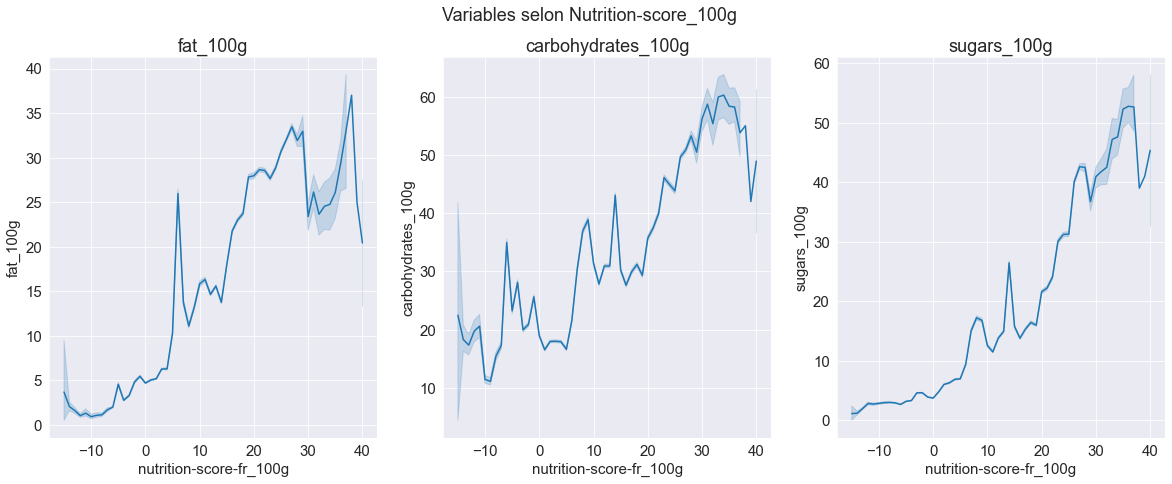

In [10]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(20, 7))

ax0.set_title("fat_100g")
sns.lineplot(ax=ax0, data=data_final[data_final["fat_100g"]<=100], y="fat_100g", x="nutrition-score-fr_100g")

ax1.set_title('carbohydrates_100g')
sns.lineplot(ax=ax1, data=data_final[data_final["carbohydrates_100g"]<=100], y="carbohydrates_100g", x="nutrition-score-fr_100g")

ax2.set_title('sugars_100g')
sns.lineplot(ax=ax2, data=data_final[data_final["sugars_100g"]<=100], y="sugars_100g", x="nutrition-score-fr_100g")

fig.suptitle('Variables selon Nutrition-score_100g')
plt.show()

Nous observons graphiquement une tendance linéaire sur ces 3 derniers graphiques. En effet, le nutriscore est étroitement relié à ces variables et il sera donc important de les inclure dans nos algorithmes de prédiction.

## Prédiction du nutrition score

Il est maintenant temps de passer au choix d'un algorithme de Machine Learning qui sera le plus adapté, et donc plus performant, nous permettant, lorsque la donnée est manquante, de prédire le Nutriscore. Pour ce faire, nous allons utiliser la librairie **SKLearn**, qui nous permet de faire des algorithmes complexes de manière plus simple. 

Avant de commencer à entraîner ces modèles, nous allons réaliser une Analyse en composantes principales (ACP) pour réduire toutes nos variables en 2 composantes et ainsi observer la répartition de nos produits par Nutriscore. De cette façon nous pourrons peut-être en tirer des informations quand à l'algorithme le plus pertinent. 

### Initialisation des paramètres

In [11]:
data_final.shape

(1230610, 18)

In [ ]:
#training_data_nutri = data_final.loc[(data_final['fat_100g'].notnull() == True) & (data_final['carbohydrates_100g'].notnull() == True) 
#                                  & (data_final['sugars_100g'].notnull() == True) & (data_final['nutrition-score-fr_100g'].notnull() == True)
#                                 & (data_final['nova_group'].notnull() == True) & (data_final.pnns_groups_1.notnull() == True)]


In [12]:
training_data_nutri = data_final.copy()

training_data_nutri = training_data_nutri.dropna(thresh=18)

training_data_nutri.pnns_groups_1 = training_data_nutri.pnns_groups_1.replace(training_data_nutri.pnns_groups_1.unique(),[1,2,3,4,5,6,7,8,9,10])

In [13]:
training_data_nutri.columns

Index(['code', 'product_name', 'pnns_groups_1', 'nova_group', 'energy_100g',
       'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'salt_100g', 'saturated-fat_100g', 'nutrition-score-fr_100g',
       'fiber_100g', 'calcium_100g', 'cholesterol_100g', 'trans-fat_100g',
       'iron_100g', 'additives_n'],
      dtype='object')

In [14]:
features = ['pnns_groups_1', 'nova_group', 'energy_100g','proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g','salt_100g', 
            'saturated-fat_100g','fiber_100g','calcium_100g','cholesterol_100g','trans-fat_100g','iron_100g', 'additives_n']

X = training_data_nutri.loc[:, features].values
Y = training_data_nutri.loc[:,['nutrition-score-fr_100g']].values

Nos paramètres sont désormais définis, commençons maintenant par notre analyse en composantes principales.
### ACP
Il nous faut pour cela, dans un premier temps, standardiser tous nous composants. Puis appliquer l'algorithme de ACP, qui aura projeté toutes nos variables sur seulement 2 axes (PC1 et PC2). 

Nous verrons finalement la répartition du nutriscore sous ces nouveaux axes.

In [17]:
x = StandardScaler().fit_transform(X)

In [18]:
pd.DataFrame(data = x, columns = features).head()

,pnns_groups_1,nova_group,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,sugars_100g,salt_100g,saturated-fat_100g,fiber_100g,calcium_100g,cholesterol_100g,trans-fat_100g,iron_100g,additives_n
0,-1.301711,-0.462884,0.078934,-0.970502,-0.886965,1.768518,2.743884,-0.149237,-0.718370,1.778347,-0.210454,-0.033664,-0.055387,-0.038065,-0.771761
1,-0.944431,0.589349,-0.145260,-0.567784,-0.176505,0.148882,0.515630,-0.071044,-0.413789,-0.170849,-0.180942,-0.028684,1.054183,-0.029816,0.058606
2,-0.587151,-0.462884,-0.050147,0.238861,-0.813263,0.678720,-0.736800,0.034462,-0.667657,-0.117246,-0.161193,-0.033664,-0.055387,0.065049,-0.771761
3,-0.229871,0.589349,-0.976817,-0.322284,-0.436122,-0.970312,-0.757824,-0.088930,-0.282819,-0.571166,-0.146992,-0.023668,-0.055387,-0.027015,1.442553
4,-0.944431,0.589349,-0.898009,-0.123948,-0.488576,0.558962,0.213008,-0.149237,-0.566080,-0.414499,-0.210454,-0.033664,-0.055387,-0.038065,1.442553


In [19]:
pca = PCA(2)

In [20]:
principalComponents = pca.fit_transform(x)

In [21]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [22]:
principalDf.head()

,PC1,PC2
0,1.447966,-2.762700
1,0.219088,-1.194444
2,-0.624114,-0.402498
3,-1.202954,-0.539006
4,-0.133452,-1.708184


In [23]:
y = training_data_nutri['nutrition-score-fr_100g'].reset_index()

finalDf = pd.concat([principalDf, y['nutrition-score-fr_100g']], axis = 1)
finalDf

,PC1,PC2,nutrition-score-fr_100g
0,1.447966,-2.762700,3.0
1,0.219088,-1.194444,9.0
2,-0.624114,-0.402498,2.0
3,-1.202954,-0.539006,2.0
4,-0.133452,-1.708184,0.0
...,...,...,...
211324,1.948376,-0.470436,17.0
211325,1.332728,-0.609575,14.0
211326,1.894898,0.008826,18.0
211327,-0.422062,-0.771962,0.0


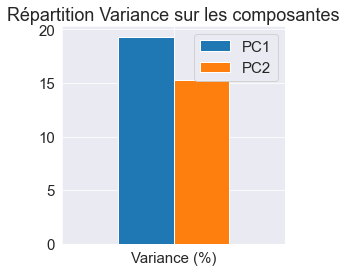

In [30]:
df = pd.DataFrame(columns = ['PC1','PC2'])
df.loc['Variance (%)']=(pca.explained_variance_ratio_.round(3)*100)

f, ax = plt.subplots(figsize=(4, 4))
plt.title('Répartition Variance sur les composantes')
df.plot(kind='bar', ax=ax)
plt.xticks(rotation=0)
plt.show()

Ensemble, les deux composantes principales contiennent 29.4% de l'information (variance). La première composante principale contient 15.2% de la variance et 14.2% pour la deuxième composante. 

Regardons également le cercle des corrélations pour ces deux composantes afin de voir comment nos variables sont définies par celles-cis. Nous allons utiliser pour cela une fonction **display_circles** qui est disponible sur le Github d'OpenClassrooms.

In [31]:
from matplotlib.collections import LineCollection

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,7))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('P{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('P{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (P{} et P{})".format(d1+1, d2+1))
            plt.show(block=False)

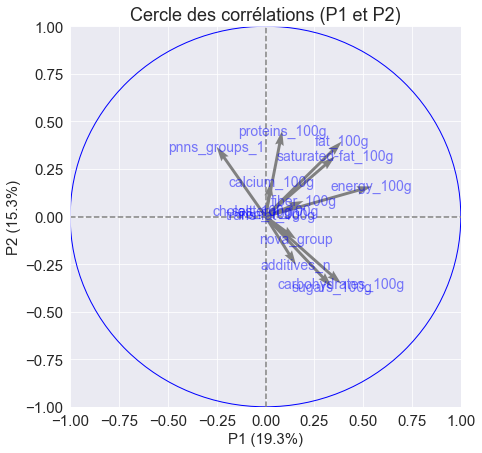

In [32]:
pcs = pca.components_
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(features))

Nous zoomons au centre du cerce afin de mieux voir nos variables.

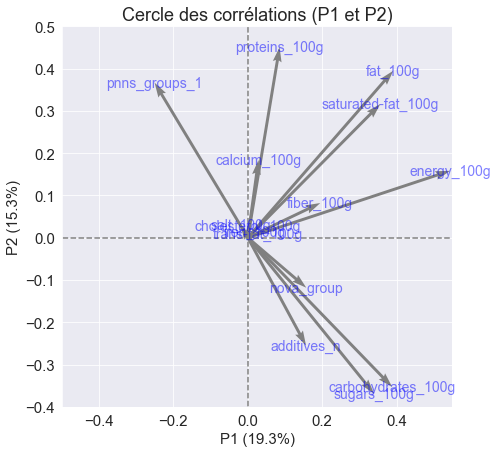

In [35]:
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(features), lims=[-0.5,0.55,-0.4,0.5])

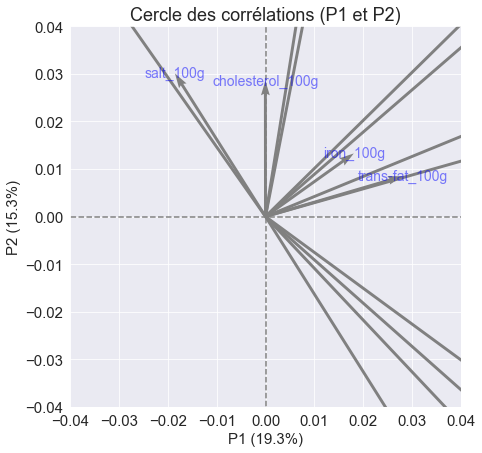

In [38]:
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(features), lims=[-0.04,0.04,-0.04,0.04])

Le cercle de corrélation nous permet d'observer la représentation de nos variables sur ces deux nouvelles composantes. Nous remarquons dans notre cas que certaines de nos variables initiales sont très peu représentées par ces composantes, comme **salt, cholesterol, iron et trans-fat**. Néanmoins les autres variables, notamment celles qui étaient plus corrélées au Nutriscore sont plus parlantes ici. 

Visualisons ci-dessous nos produits représentés sur nos 2 composantes, en observant leur nutriscore.

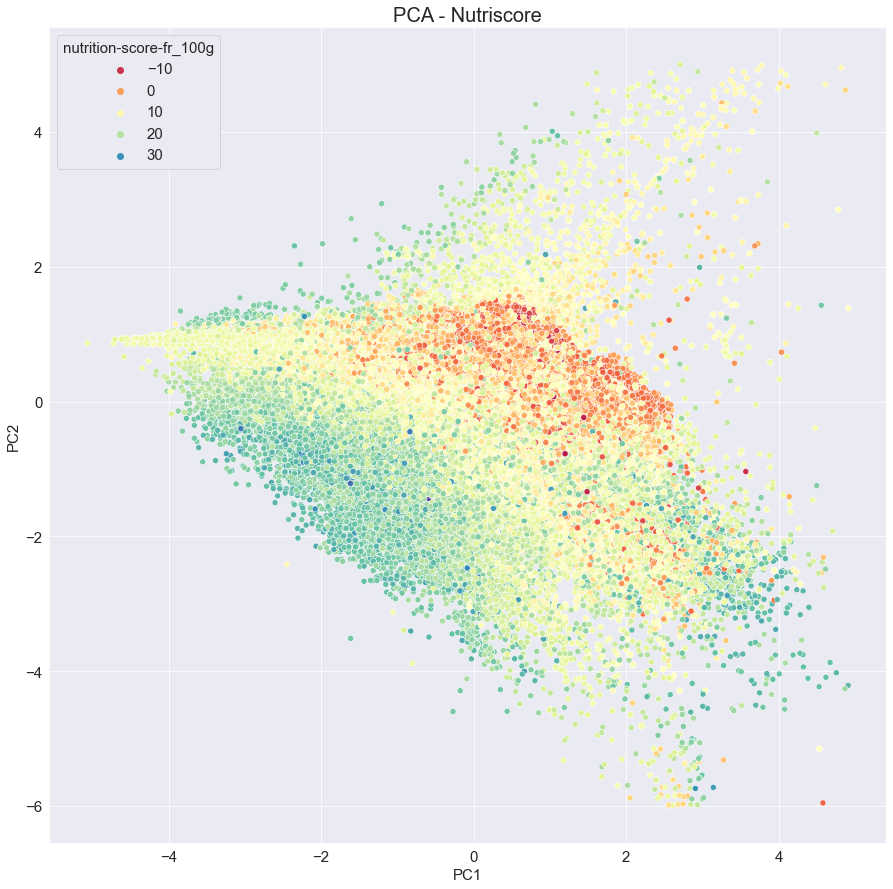

In [22]:
f, ax = plt.subplots(figsize=(15,15))
plt.title('PCA - Nutriscore', fontsize=20)
sns.scatterplot(data=finalDf[(finalDf["PC1"]<=5) & (finalDf["PC2"]<=5) & (finalDf["PC2"]>=(-6))], 
                x="PC1", y="PC2", hue="nutrition-score-fr_100g", palette="Spectral", legend='auto')

Nous remarquons sur ce graphiques une répartition du nutriscore plutôt continue parmis les produits, notamment pour les nutriscores entre 0 et 25. Les regroupements se font cependant en plusieurs zones notamment pour les nutriscores élevés (aux alentours de 30).

Un algorithme de type K-nearest neighbors semble pertinent pour ce cas. Il est donc désormais temps de passer à notre sélection d'algorithme de Machine Learning.

Afin de s'essayer à cette librairie, nous allons tester deux différents modèles :
- Modèle de K-nearest neighbors Regressor
- Modèle de Régression linéaire

### Modèle 1 : KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X, Y, train_size=0.8)

knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(xtrain2, ytrain2)

nutri_ypred2 = knn.predict(xtest2)

print('Mean squared error: %.2f'
      % mean_squared_error(ytest2, nutri_ypred2))

print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest2, nutri_ypred2))

print('Coefficient of determination: %.2f'
      % knn.score(xtest2, ytest2))

Mean squared error: 6.88
Mean absolute error: 1.38
Coefficient of determination: 0.92


[Text(0, 0.5, 'Prédiction de Y'), Text(0.5, 0, 'Y réel')]

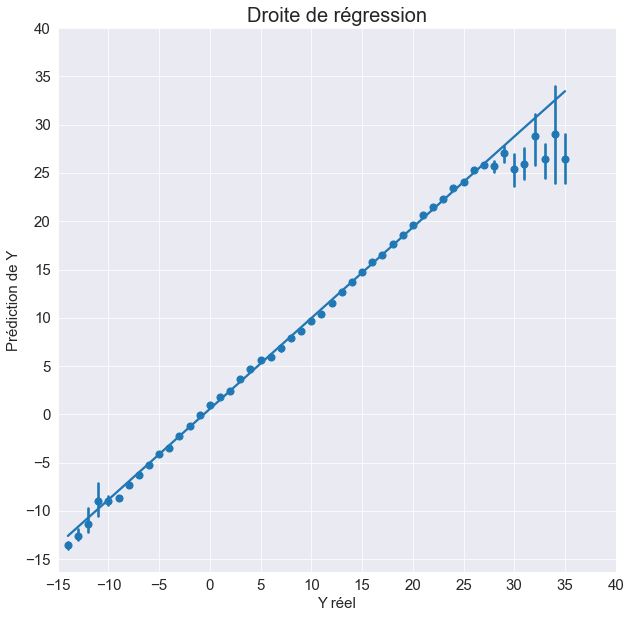

In [40]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Droite de régression', fontsize=20)
ax = sns.regplot(x = ytest2, y =nutri_ypred2, x_estimator=np.mean)
ax.yaxis.grid(True)
ax.set_xticks([-15,-10,-5,0,5,10,15,20,25,30,35,40])
ax.set_yticks([-15,-10,-5,0,5,10,15,20,25,30,35,40])
ax.set(xlabel="Y réel", ylabel="Prédiction de Y")

Cherchons notre nombre de voisins pour que l'erreur moyenne quadratique soit minimale. Pour cela nous allons tester plusieurs valeurs et ensuite regarder les valeurs d'erreur graphiquement. 

In [45]:
errors = []
coef = []
for k in range(1,11,1):
    knn = neighbors.KNeighborsRegressor(k)
    knn.fit(xtrain2, ytrain2)
    errors.append(mean_absolute_error(ytest2, knn.predict(xtest2)))
    coef.append(knn.score(xtest2, ytest2))

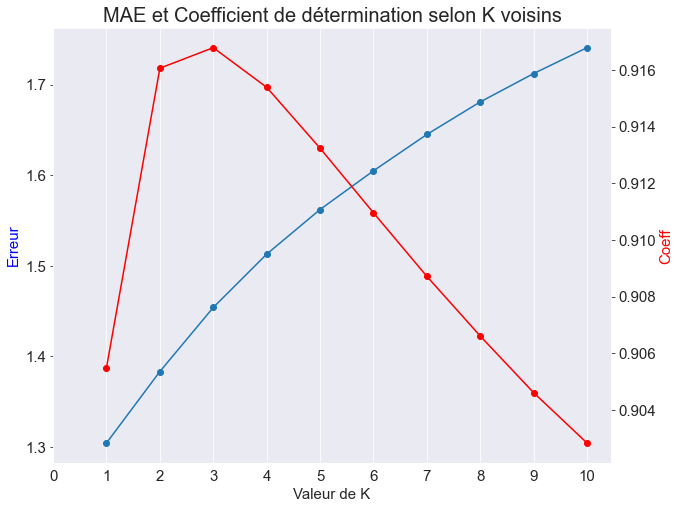

In [76]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title("MAE et Coefficient de détermination selon K voisins", fontsize=20) 

ax.plot(range(1,11,1), errors, 'o-')

secax=ax.twinx()
secax.plot(range(1,11,1), coef, 'o-', color='r')
secax.set_ylabel('Coeff', color='r')

ax.yaxis.grid(False)
secax.yaxis.grid(False)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
secax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])

ax.set_ylabel("Erreur", color='b')
ax.set(xlabel="Valeur de K")
plt.show()

Nous constatons ici que le nombre de voisin idéal est 1 ou 2. Une fois passer au-delà de cette valeur, nous observons que notre MAE augmente dû à un problème d'overfitting. Nous garderons pour ce cas 2 qui permet de garder un coefficient de détermination de 0,92.

### Modèle 2 : Regression linéaire

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

regr = linear_model.LinearRegression()

regr.fit(xtrain, ytrain)

nutri_ypred = regr.predict(xtest)

print('Mean squared error: %.2f'
      % mean_squared_error(ytest, nutri_ypred))

print('Mean absolute error: %.2f'
      % mean_absolute_error(ytest, nutri_ypred))

print('Coefficient of determination: %.2f'
      % r2_score(ytest, nutri_ypred))

Mean squared error: 22.58
Mean absolute error: 3.75
Coefficient of determination: 0.73


[Text(0, 0.5, 'Prédiction de Y'), Text(0.5, 0, 'Y réel')]

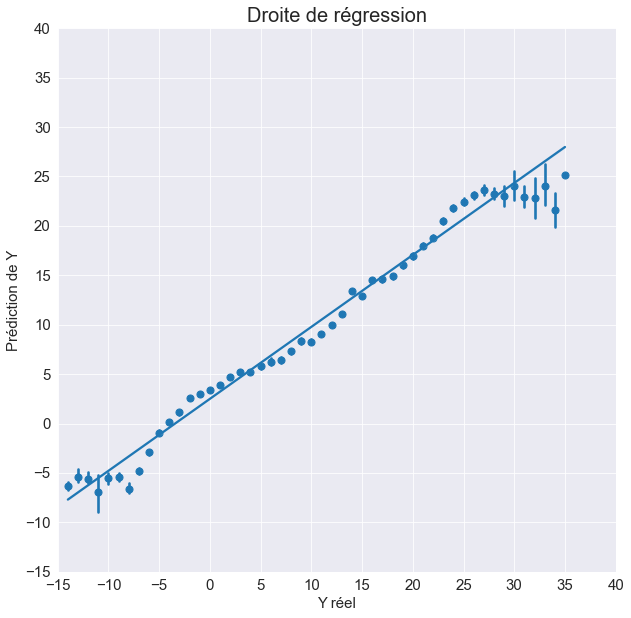

In [78]:
f, ax = plt.subplots(figsize=(10, 10))
plt.title('Droite de régression', fontsize=20)
ax = sns.regplot(x = ytest, y =nutri_ypred, x_estimator=np.mean)
ax.yaxis.grid(True)
ax.set_xticks([-15,-10,-5,0,5,10,15,20,25,30,35,40])
ax.set_yticks([-15,-10,-5,0,5,10,15,20,25,30,35,40])
ax.set(xlabel="Y réel", ylabel="Prédiction de Y")

## Synthèse sur la faisabilité de l'Application

De nombreux modèles sont disponibles pour nous aider à réaliser des prédictions comme par exemple pour le Nutriscore. Ici, nous devons trouver une valeur parmi 55 possibles (le Nutriscore est un entier entre -15 et 40). 

Retour sur nos modèles de prédiction :
- Jusqu'à présent, le modèle du KNN Regressor a montré être le plus fiable en atteignant une MAE aux alentours de 1,37. Cela confirme notre hypothèse effectuée suite à la ACP. L'algorithme est très efficace pour prédire les valeurs de nutriscore entre -10 et 25, puis un peu moins fiable aux extrémités. 

- Notre premier test effectué avec le modèle de Regression linéaire classique a correctement fonctionné, il est plutôt adapté à cet exercice. Cependant, si nous devions l'améliorer, il nous faudrait augmenter la pertinence de nos paramêtres. 

Pour notre application nous gardons donc à aujourd'hui notre modèle 1 du KNN Regressor. Celui-ci permet très bien de répondre au besoin de notre application. Celle-ci est donc totalement faisable avec la base de donnée OpenFoodFacts. 

Voici quelques pistes qui permettraient de faire évoluer ce projet :
- Afiner les paramètres d'entrée des algorithmes.
- En réduisant le nombre de variables à l'aide d'une ACP par exemple.
- Créer et paramétrer nous-même un algorithme de machine learning qui serait adapté à l'application.
